# ARMA_MODEL

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- importando os dados dos crimes sexuais

In [2]:
crimes_sexuais = pd.read_csv('crimes_sexuais.csv')

In [3]:
crimes_sexuais.head()

,data_da_ocorrencia,crimes_sexuais
0,2014-01-01,43
1,2014-01-02,5
2,2014-01-03,3
3,2014-01-04,3
4,2014-01-05,8


 - convertendo as coluna data para Datetime

In [4]:
crimes_sexuais['data_da_ocorrencia'] = pd.to_datetime(crimes_sexuais['data_da_ocorrencia'])

 - Selecionando apenas os delitos concluídos nos anos 2014 e 2015

In [5]:
crimes_sexuais = crimes_sexuais.query(' data_da_ocorrencia >= "2014-01-01"')

In [6]:
crimes_sexuais['data_da_ocorrencia'].dt.year.value_counts()

2015    365
2014    365
Name: data_da_ocorrencia, dtype: int64

 - Definindo a data como índice

In [7]:
crimes_sexuais = crimes_sexuais.set_index('data_da_ocorrencia')

 - Graficando "crimes_sexuais"

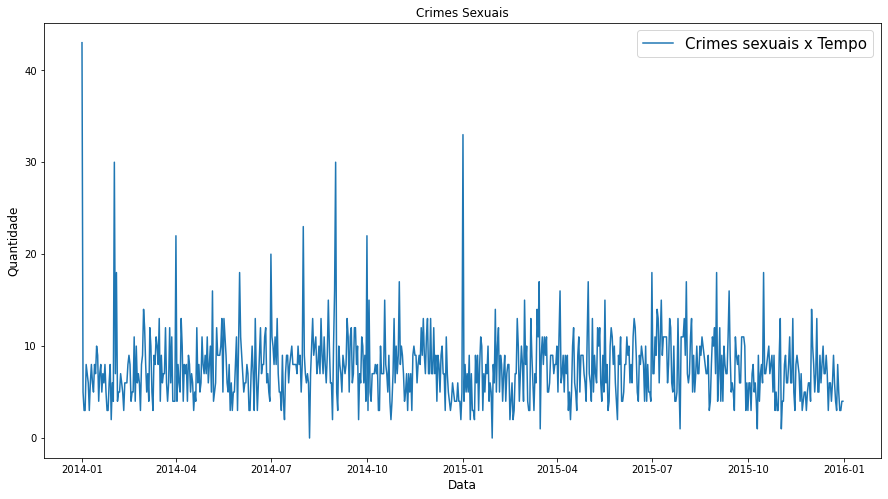

In [8]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

## Fazendo a decomposição sazonal

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
resultado = seasonal_decompose(crimes_sexuais, period=12)

 - obtendo os componentes

In [11]:
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid

Text(0.5, 1.0, 'Tendencia')

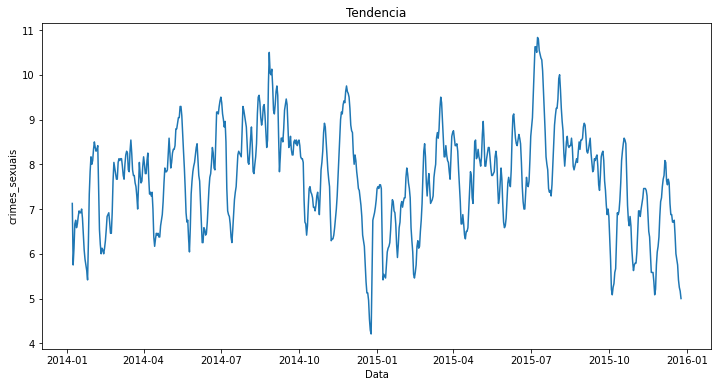

In [12]:
plt.figure(figsize=(12,6))
plt.plot(tendencia)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Tendencia')

Text(0.5, 1.0, 'Sazonalidade')

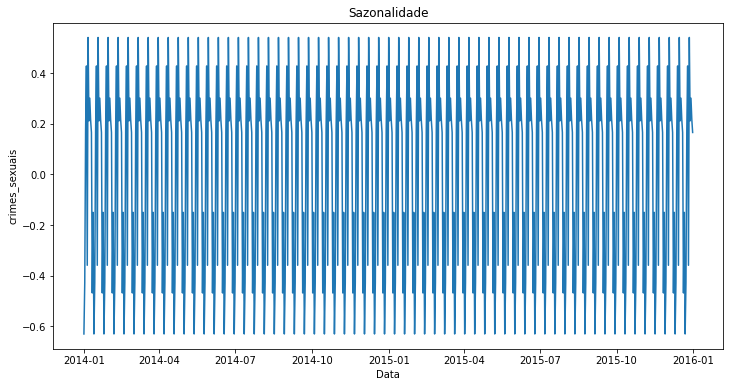

In [13]:
plt.figure(figsize=(12,6))
plt.plot(sazonalidade)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Sazonalidade')

Text(0.5, 1.0, 'Resíduo')

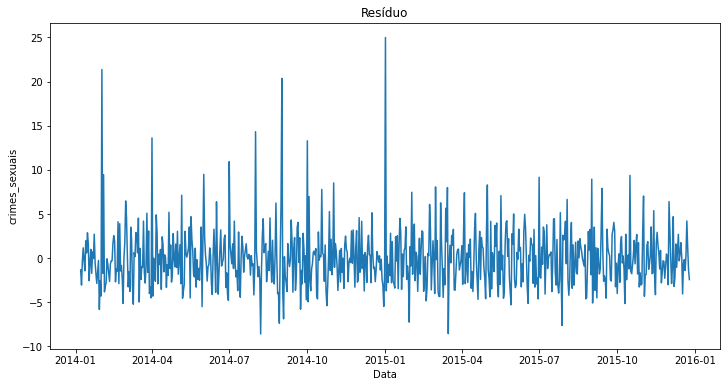

In [14]:
plt.figure(figsize=(12,6))
plt.plot(residuo)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Resíduo')


## Graficando  autocorrelação

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

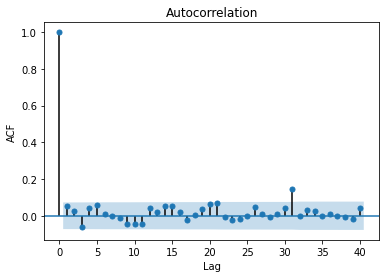

In [16]:
plot_acf(crimes_sexuais.values,lags=40)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

 - alterando o range

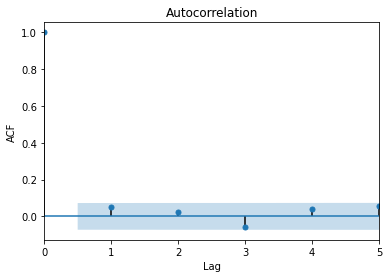

In [17]:
plot_acf(crimes_sexuais.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.xlim([0,5])
plt.show()

 - ACF tem Lag igual a 1

## Graficando autocorrelação parcial

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

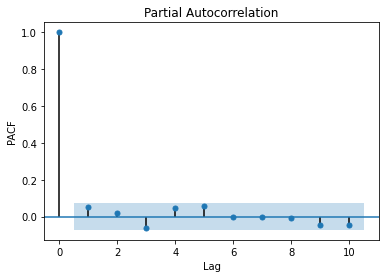

In [19]:
plot_pacf(crimes_sexuais.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

 - Alterando o range

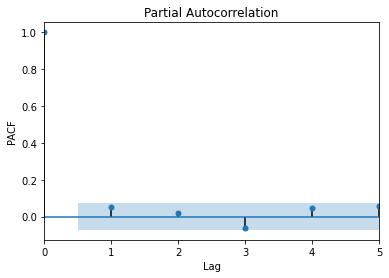

In [20]:
plot_pacf(crimes_sexuais.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.xlim([0,5])
plt.show()

 -  PACF tem lag igual a 1.


 - Lag Plot

In [21]:
from pandas.plotting import lag_plot

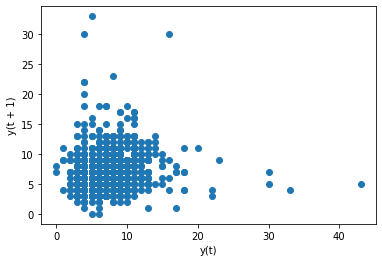

In [22]:
lag_plot(crimes_sexuais)

In [23]:
t_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].index.values
t_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].index.values
X_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].values
X_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].values

- Aplicando o modelo auto regressivo

In [24]:
from statsmodels.tsa.api import ARMA

In [25]:
modelo = ARMA(X_treino,order=(1,1))
resultado = modelo.fit()

 - Coeficientes

In [26]:
print('Coefficients: %s' % resultado.params)

Coefficients: [ 7.71098407  0.06867188 -0.04589403]


 - Fazendo as predições

In [27]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

 - Calculando erros

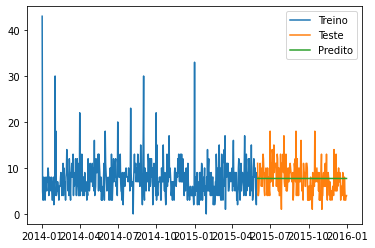

In [28]:
plt.plot(t_treino,X_treino,label='Treino')
plt.plot(t_teste,X_teste,label='Teste')
plt.plot(t_teste,X_pred,label='Predito')
plt.legend()

 - calculando erros

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
MSE = mean_squared_error(X_teste,X_pred)

In [32]:
RMSE = np.sqrt(MSE)

In [33]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.28


 - Grid search

In [34]:
best = 1e6
i_best = 0
j_best = 0

for i in range(1,10):
    for j in range(0,2):
        modelo = ARMA(X_treino, order=(i, j))
        resultado = modelo.fit()
        AIC = resultado.aic
        X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)
        MSE = mean_squared_error(X_teste,X_pred)
        RMSE = np.sqrt(MSE)
        if(RMSE<best):
            best = RMSE
            i_best = i
            j_best = j
        print("i = {} j = {} AIC = {:0.2f} RMSE = {:0.2f}".format(i,j,AIC,RMSE))
        
print("Melhor i = {}".format(i_best))
print("Melhor j = {}".format(j_best))

i = 1 j = 0 AIC = 2924.38 RMSE = 3.28
i = 1 j = 1 AIC = 2926.37 RMSE = 3.28
i = 2 j = 0 AIC = 2926.31 RMSE = 3.28
i = 2 j = 1 AIC = 2927.50 RMSE = 3.28
i = 3 j = 0 AIC = 2920.80 RMSE = 3.27
i = 3 j = 1 AIC = 2922.36 RMSE = 3.27
i = 4 j = 0 AIC = 2922.06 RMSE = 3.27
i = 4 j = 1 AIC = 2923.73 RMSE = 3.27
i = 5 j = 0 AIC = 2923.33 RMSE = 3.27
i = 5 j = 1 AIC = 2925.25 RMSE = 3.27
i = 6 j = 0 AIC = 2925.28 RMSE = 3.27
i = 6 j = 1 AIC = 2926.36 RMSE = 3.27
i = 7 j = 0 AIC = 2927.27 RMSE = 3.27
i = 7 j = 1 AIC = 2927.92 RMSE = 3.27
i = 8 j = 0 AIC = 2927.89 RMSE = 3.27
i = 8 j = 1 AIC = 2928.12 RMSE = 3.27
i = 9 j = 0 AIC = 2928.38 RMSE = 3.27
i = 9 j = 1 AIC = 2929.62 RMSE = 3.27
Melhor i = 9
Melhor j = 1


In [37]:
modelo = ARMA(X_treino, order=(9,1))
resultado = modelo.fit()
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

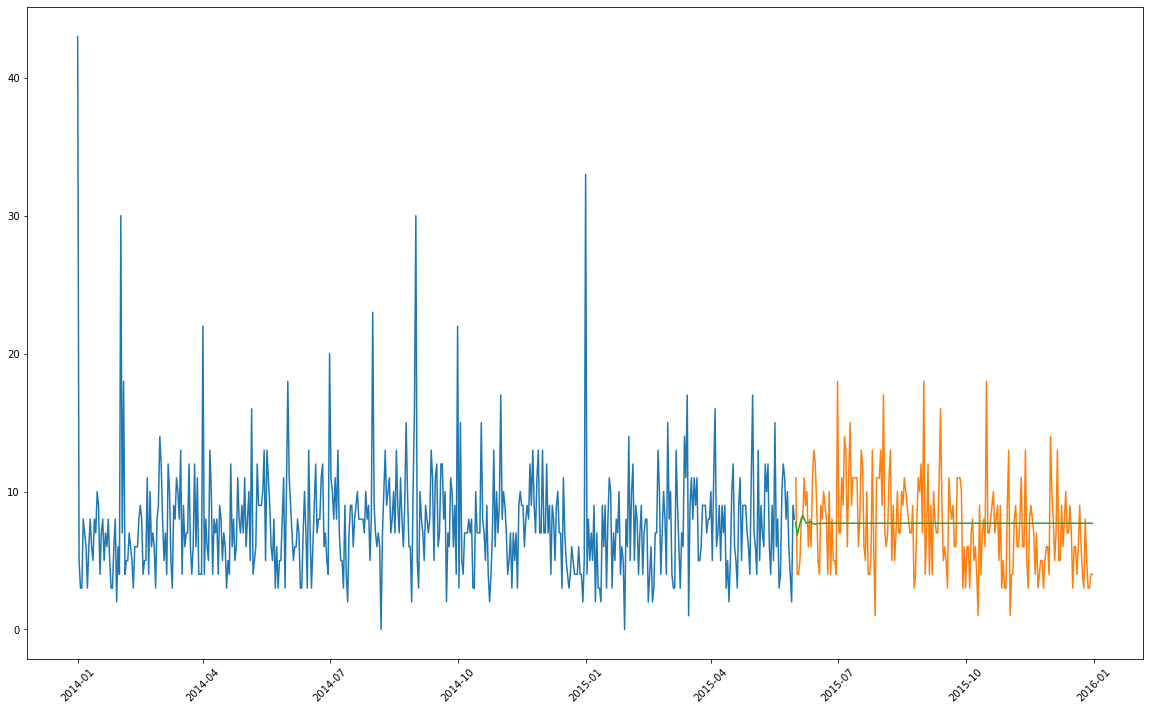

In [40]:
plt.figure(figsize=(20,12))
plt.plot(t_treino,X_treino,label='Treino');
plt.plot(t_teste,X_teste,label='Teste');
plt.plot(t_teste,X_pred,label='Predito');
plt.xticks(rotation=45);